IMPORTING DATASETS

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [13]:
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

In [15]:
games = reduce_memory(pd.read_csv("/kaggle/input/game-recommendations-on-steam/games.csv"))
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [16]:
recommendations = reduce_memory(pd.read_csv("/kaggle/input/game-recommendations-on-steam/recommendations.csv"))
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.299999,51580,0
1,304390,4,0,2017-02-17,False,11.500000,2586,1
2,1085660,2,0,2019-11-17,True,336.500000,253880,2
3,703080,0,0,2022-09-23,True,27.400000,259432,3
4,526870,0,0,2021-01-10,True,7.900000,23869,4


In [17]:
users = reduce_memory(pd.read_csv("/kaggle/input/game-recommendations-on-steam/users.csv"))
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [18]:
games_metadata = pd.read_json('/kaggle/input/game-recommendations-on-steam/games_metadata.json', lines=True)
games_metadata.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int32  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int32  
 8   user_reviews    50872 non-null  int32  
 9   price_final     50872 non-null  float32
 10  price_original  50872 non-null  float32
 11  discount        50872 non-null  float32
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float32(3), int32(3), object(3)
memory usage: 2.5+ MB


In [20]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int32  
 1   helpful         int32  
 2   funny           int32  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float32
 6   user_id         int32  
 7   review_id       int32  
dtypes: bool(1), float32(1), int32(5), object(1)
memory usage: 1.3+ GB


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   products  int32
 2   reviews   int32
dtypes: int32(3)
memory usage: 163.7 MB


In [22]:
games.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

Now, let us find out how many games were released each eyar

In [23]:
games['date_release'].isnull().sum()

0

In [24]:
# to_datetime is used to convert into datetime dtype
games['date_release'] = pd.to_datetime(games['date_release'])
games['release_year'] = games['date_release'].dt.year

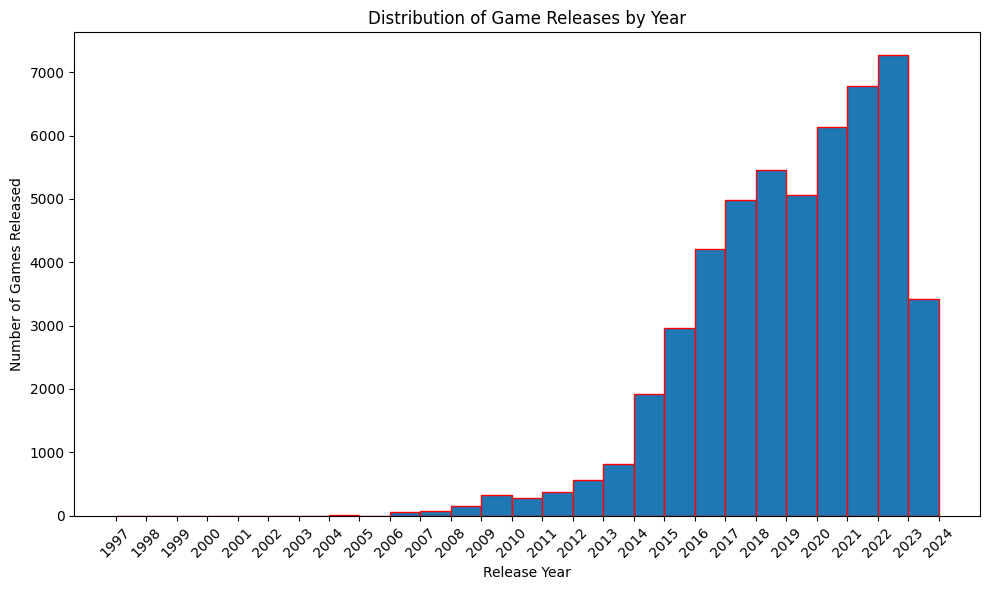

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(games['release_year'], bins=range(min(games['release_year']), max(games['release_year']) + 2), edgecolor='red')
plt.title('Distribution of Game Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.xticks(range(min(games['release_year']), max(games['release_year']) + 2))
plt.xticks(rotation=45)
plt.tight_layout()

Calculating the Percentage of Games that Support Windows, MacOS, Linux

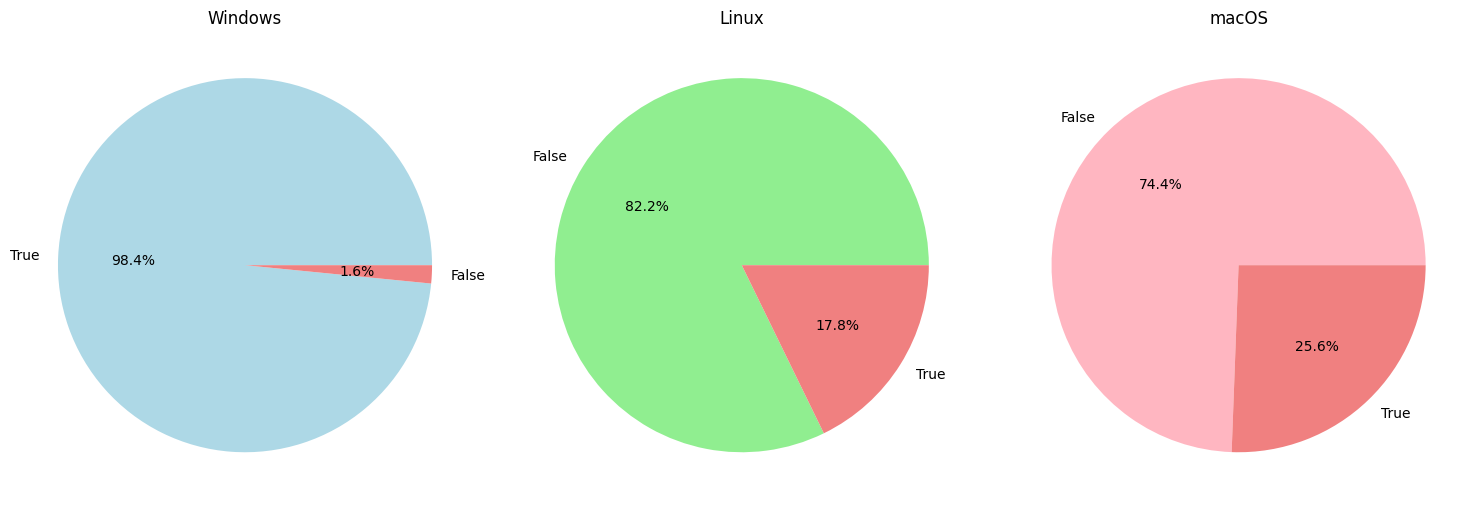

In [26]:
counts_win = games['win'].value_counts()
counts_linux = games['linux'].value_counts()
counts_mac = games['mac'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# pie chart for Windows
axs[0].pie(counts_win, labels=counts_win.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axs[0].set_title('Windows')

# pie chart for Linux
axs[1].pie(counts_linux, labels=counts_linux.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axs[1].set_title('Linux')

# pie chart for macOS
axs[2].pie(counts_mac, labels=counts_mac.index, autopct='%1.1f%%', colors=['lightpink', 'lightcoral'])
axs[2].set_title('macOS')
plt.tight_layout()

Counting the Different Rating of Games and focusing on the "Positivity"

In [27]:
games['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

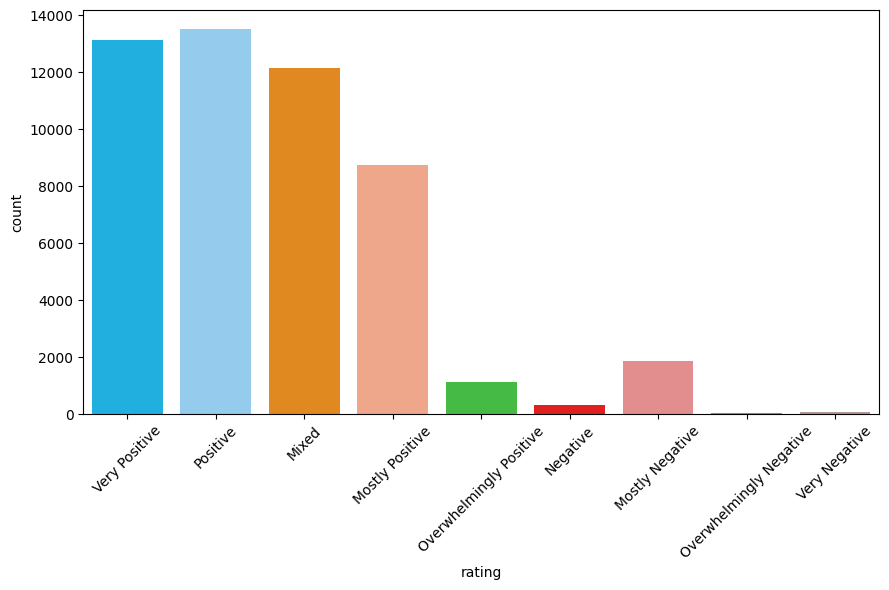

In [28]:
plt.figure(figsize=(9, 6))
sn.countplot( x='rating' , data = games , 
    palette = [
    'DeepSkyBlue',        # Very Positive
    'LightSkyBlue',       # Positive
    'DarkOrange',         # Mixed
    'LightSalmon',        # Mostly Positive
    'LimeGreen',          # Overwhelmingly Positive
    'Red',                # Negative
    'LightCoral',         # Mostly Negative
    'MediumPurple',       # Overwhelmingly Negative
    'RosyBrown'           # Very Negative
])
plt.xticks(rotation=45)
plt.tight_layout()

In [29]:
print("Number of Positively Rated Games (Rating > 70) :- ",(games[games['positive_ratio'] >= 70].shape[0] / games.shape[0]) * 100)
print("Number of Positively Rated Games (Rating < 70) :- ",(games[games['positive_ratio'] < 70].shape[0] / games.shape[0]) * 100)

Number of Positively Rated Games (Rating > 70) :-  71.72707972951721
Number of Positively Rated Games (Rating < 70) :-  28.272920270482782


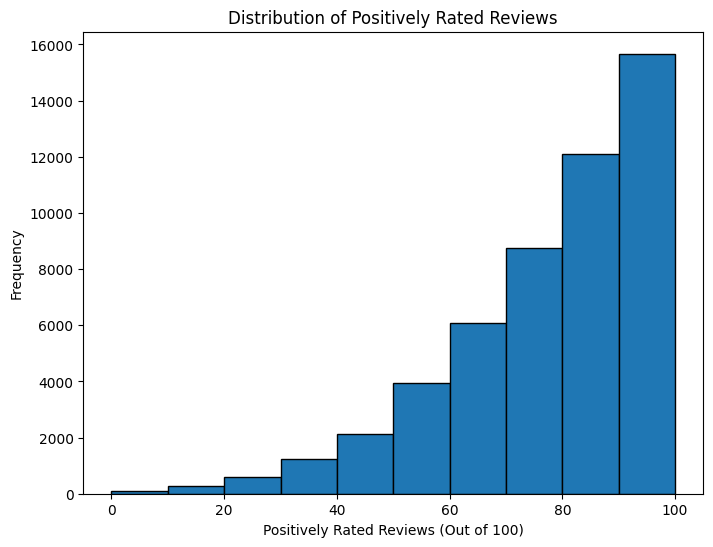

In [30]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(games['positive_ratio'], bins=10, edgecolor='black')
plt.title('Distribution of Positively Rated Reviews')
plt.xlabel('Positively Rated Reviews (Out of 100)')
plt.ylabel('Frequency')
plt.show()

In [31]:
print(min(games['price_final']))
print(max(games['price_final']))

price_bins = [0, 100, 200, float('inf')] 

price_labels = ['Low-priced', 'Medium-priced', 'High-priced']

# 'price_category' based on price bins
games['price_category'] = pd.cut(games['price_final'], bins=price_bins, labels=price_labels)

# Group by price category and calculate mean positive ratio and mean user reviews for each category
segmented_analysis = games.groupby('price_category').agg({
    'positive_ratio': 'mean',
    'user_reviews': 'mean'
})

print(segmented_analysis)

0.0
299.989990234375
                positive_ratio  user_reviews
price_category                              
Low-priced           77.222933   1672.699969
Medium-priced        77.840000     32.360000
High-priced          87.666667     69.666667


/tmp/ipykernel_274/845871193.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_analysis = games.groupby('price_category').agg({


In [33]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,release_year,price_category
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,2008,Low-priced
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,2011,Low-priced
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,2013,Low-priced
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,2014,Low-priced
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,2014,Low-priced


In [34]:
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [35]:
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.299999,51580,0
1,304390,4,0,2017-02-17,False,11.500000,2586,1
2,1085660,2,0,2019-11-17,True,336.500000,253880,2
3,703080,0,0,2022-09-23,True,27.400000,259432,3
4,526870,0,0,2021-01-10,True,7.900000,23869,4


In [36]:
# Here User_ID is auto genrated id due to privacy concerns
users['user_id'].unique().shape[0]

14306064

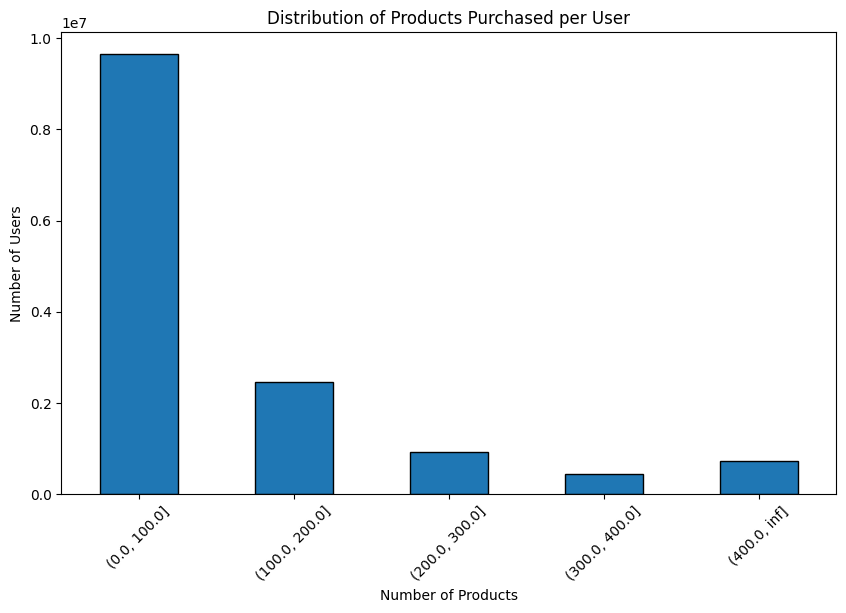

In [37]:
bins = [0 , 100 , 200 , 300 , 400 , float('inf')]

users['product_bin'] = pd.cut(users['products'], bins=bins)

# Count the number of users in each bin
bin_counts = users['product_bin'].value_counts().sort_index()

# Plot a bar plot of the distribution of products per user
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Products Purchased per User')
plt.xlabel('Number of Products')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

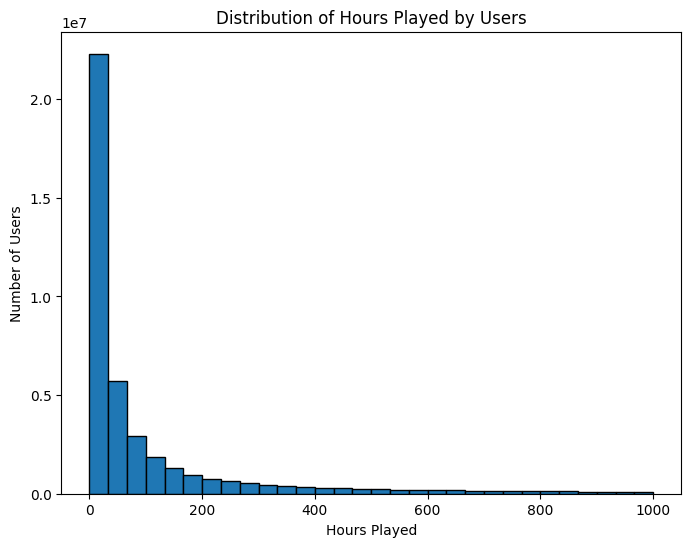

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(recommendations['hours'], bins=30, edgecolor='black')
plt.title('Distribution of Hours Played by Users')
plt.xlabel('Hours Played')
plt.ylabel('Number of Users')
plt.show()

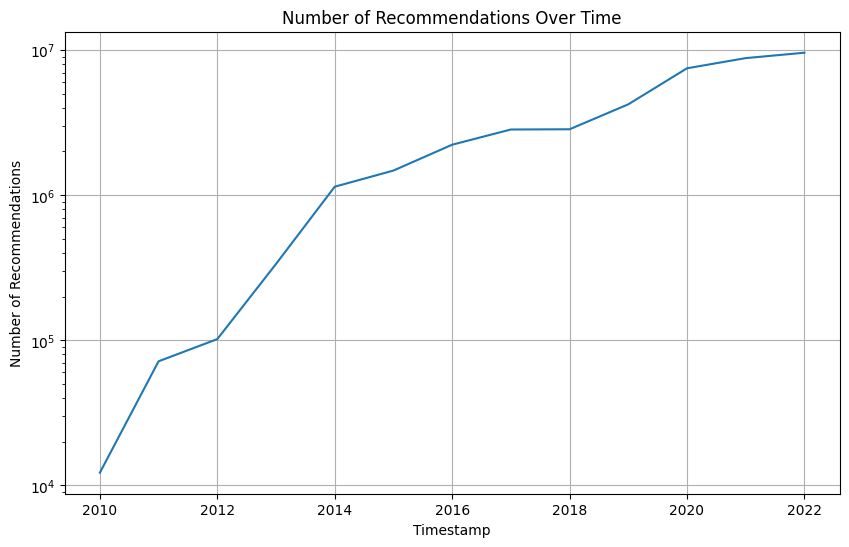

In [53]:
# to_datetime is used to convert into datetime dtype
recommendations['date'] = pd.to_datetime(recommendations['date'])
recommendations['publish_year'] = recommendations['date'].dt.year

recommendations_by_time = recommendations['publish_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(recommendations_by_time.index, recommendations_by_time.values)
plt.title('Number of Recommendations Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Recommendations')
plt.grid(True)
plt.yscale('log')
plt.show()

In [55]:
correlation_matrix = recommendations[['helpful', 'funny', 'is_recommended']].corr()

print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                 helpful    funny  is_recommended
helpful         1.000000  0.48036       -0.026876
funny           0.480360  1.00000       -0.003370
is_recommended -0.026876 -0.00337        1.000000


In [56]:
correlation = recommendations['hours'].corr(recommendations['is_recommended'])
print("Correlation between user activity and recommendation ratings:", correlation)

Correlation between user activity and recommendation ratings: 0.04554176515547841


is_recommended
True     9118637
False    1111350
Name: count, dtype: int64


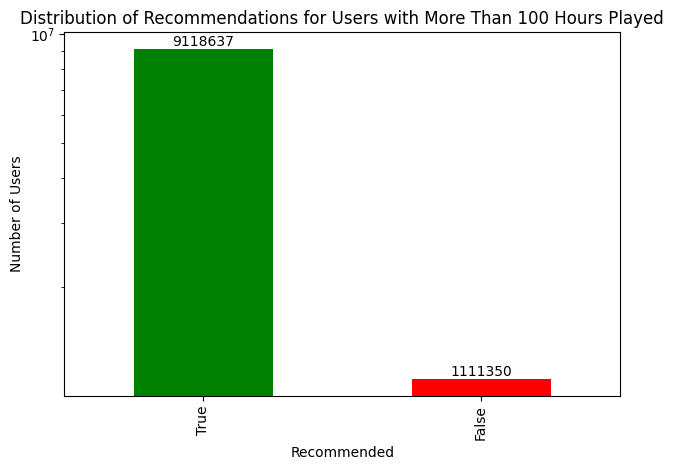

In [57]:
high_activity_users = recommendations[recommendations['hours'] > 100]

recommendation_counts = high_activity_users['is_recommended'].value_counts()
recommendation_counts.plot(kind='bar', color=['green', 'red'])

print(recommendation_counts)

for i, count in enumerate(recommendation_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')
plt.title('Distribution of Recommendations for Users with More Than 100 Hours Played')
plt.xlabel('Recommended')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.tight_layout()

In [58]:
merged_data = pd.merge(games , games_metadata , on = 'app_id' , how = 'inner')

In [59]:
merged_data.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'release_year', 'price_category',
       'description', 'tags'],
      dtype='object')

In [60]:
df = merged_data[['app_id', 'title','description', 'tags']]

In [61]:
df.head()

,app_id,title,description,tags
0,13500,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,,[Action]
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [62]:
df['tags'] = df['tags'].apply(lambda x:' '.join(x))

/tmp/ipykernel_274/3089831005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x:' '.join(x))


In [63]:
df['overview'] = df['title']+" "+df['description']+" "+df['tags']
df.head()

/tmp/ipykernel_274/494620436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['title']+" "+df['description']+" "+df['tags']


,app_id,title,description,tags,overview
0,13500,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,Action Adventure Parkour Third Person Great So...,Prince of Persia: Warrior Within™ Enter the da...
1,22364,BRINK: Agents of Change,,Action,BRINK: Agents of Change Action
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,Co-op Stealth Indie Heist Local Co-Op Strategy...,Monaco: What's Yours Is Mine Monaco: What's Yo...
3,226560,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,Zombies Adventure Survival Action Third Person...,Escape Dead Island Escape Dead Island is a Sur...
4,249050,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,Roguelike Strategy Tower Defense Pixel Graphic...,Dungeon of the ENDLESS™ Dungeon of the Endless...


In [64]:
df.shape

(50872, 5)

In [65]:
final_df = df[['app_id','title','overview']]
final_df.head()

,app_id,title,overview
0,13500,Prince of Persia: Warrior Within™,Prince of Persia: Warrior Within™ Enter the da...
1,22364,BRINK: Agents of Change,BRINK: Agents of Change Action
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine Monaco: What's Yo...
3,226560,Escape Dead Island,Escape Dead Island Escape Dead Island is a Sur...
4,249050,Dungeon of the ENDLESS™,Dungeon of the ENDLESS™ Dungeon of the Endless...


In [67]:
import re

def remove_special_characters(s):
  return re.sub(r'[^\w\s]', '', s)

In [68]:
df['overview'] = df['overview'].apply(lambda x : remove_special_characters(x))

/tmp/ipykernel_274/1345942274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].apply(lambda x : remove_special_characters(x))


In [69]:
df['overview'] = df['overview'].apply(lambda x:x.lower())

/tmp/ipykernel_274/3439119006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].apply(lambda x:x.lower())


In [70]:
import nltk

In [71]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [72]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [73]:
df['overview'] = df['overview'].apply(stem)

/tmp/ipykernel_274/432991732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].apply(stem)


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500,stop_words='english')

In [75]:
cv.fit_transform(df['overview']).toarray().shape

(50872, 1500)

In [76]:
vectors = cv.fit_transform(df['overview']).toarray()

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
similarity = cosine_similarity(vectors)

In [79]:
similarity

array([[1.        , 0.06579517, 0.09056668, ..., 0.        , 0.11396058,
        0.        ],
       [0.06579517, 1.        , 0.07647191, ..., 0.        , 0.08247861,
        0.        ],
       [0.09056668, 0.07647191, 1.        , ..., 0.        , 0.05676567,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11396058, 0.08247861, 0.05676567, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [81]:
def recommend(game):
    game_index = final_df[final_df['title'] == game].index[0]
    distances = similarity[game_index]
    game_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    for i in game_list:
        print(final_df.iloc[i[0]].title)

In [82]:
recommend('Resident Evil 4 - Separate Ways')

Resident Evil 4
Resident Evil 7 Biohazard
Resident Evil 2
Resident Evil 3
Resident Evil Village
Resident Evil 2 - Leon Costume: Arklay Sheriff
Resident Evil 2 - Claire Costume: Elza Walker
Dead by Daylight - Resident Evil Chapter
Resident Evil 2 - Claire Costume: 98'
Resident Evil 2 - Leon Costume: 98'
